In [4]:
!pip install fastbook -q 

In [5]:
from fastbook import *
from fastai.vision.widgets import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [6]:
import fastai;
print('fastai version:', fastai.__version__)
print('torch version:', torch.__version__)

fastai version: 2.7.10
torch version: 1.12.1+cu113


In [7]:
path = Path('/content/drive/MyDrive/dataset/mycat2')
keywords = {'Asian': 'Asian cat', 'Australian': 'Australian Mist cat', 'Bengal': 'Bengal cat'}
array = keywords.items()
if not path.exists():
  !mkdir -p /content/drive/MyDrive/dataset/mycat2
  for key,value in array:
    print(key,value)
    dest = (path/key)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {value}',max_images=300)
    download_images(dest, urls=urls)

In [8]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink) #unlink broken images

(#0) []

In [9]:
path = Path('/content/drive/MyDrive/dataset/mycat2')
# View all files in directory
path.ls()

(#3) [Path('/content/drive/MyDrive/dataset/mycat2/Asian'),Path('/content/drive/MyDrive/dataset/mycat2/Australian'),Path('/content/drive/MyDrive/dataset/mycat2/Bengal')]

In [10]:
#建立模型權重儲存路徑
myPath='/content/drive/MyDrive/dataset/models'
!mkdir -p $myPath

In [11]:
dataset = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms= Resize(224),
    get_y=parent_label
)

#利用框架正式讀取資料
dls = dataset.dataloaders(path,bs=16,num_workers=16)

#獲取結果
print(dls.c, dls.vocab, len(dls.train_ds), len(dls.valid_ds))

3 ['Asian', 'Australian', 'Bengal'] 668 167


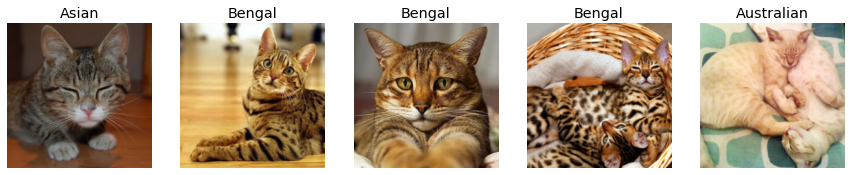

In [12]:
dls.show_batch(max_n=5, nrows=1)

In [13]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate], pretrained=True)
learn.fit_one_cycle(3, 1e-3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
myModel=myPath+'/resnet34_stage-1.pkl'
learn.export(myModel)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Minimum/10: 4.79e-05, steepest point: 3.31e-06


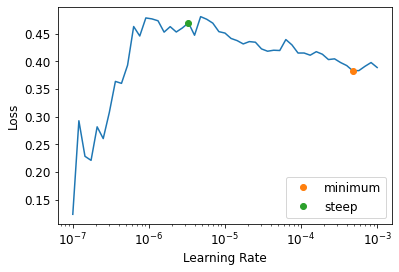

In [15]:
learn.unfreeze()
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [16]:
learn.fit_one_cycle(6, lr_max= 2.75e-04)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should b

In [17]:
myModel=myPath+'/resnet34_stage-2.pk1'
learn.export(myModel)

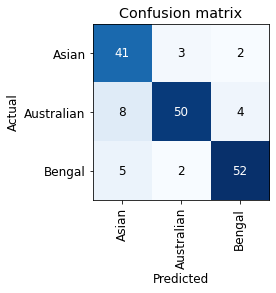

In [18]:
# Contains interpretation methods for classification models
interp = ClassificationInterpretation.from_learner(learn)
# Plot the confusion matrix
interp.plot_confusion_matrix()

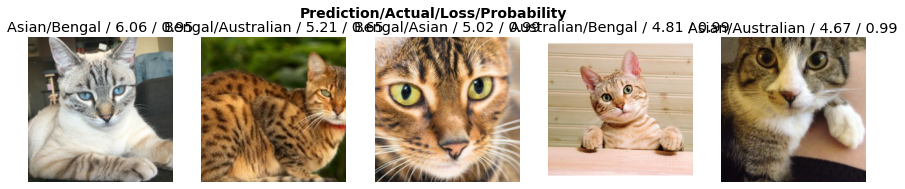

In [19]:
interp.plot_top_losses(5, nrows=1)